In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

#Modelling

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error    
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
# from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings


Importing the data


In [47]:
df= pd.read_csv('stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Preparing X &Y


In [48]:
X=df.drop(['math_score'],axis=1)
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [49]:
Y=df['math_score']
Y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

In [50]:
# Create Column Transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

OHE=OneHotEncoder()
SC= StandardScaler()


num_features =X.select_dtypes(exclude="object").columns
cat_features =X.select_dtypes(include="object").columns

preprocessor= ColumnTransformer([
    ("OneHotEncoder",OHE,cat_features),
    ("StandardScaler",SC,num_features)
    
]
)

preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(),
                                 Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['reading_score', 'writing_score'], dtype='object'))])

In [51]:
X=preprocessor.fit_transform(X)

In [52]:
X.shape

(1000, 19)

In [53]:
# Performing train test split
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=44)
X_train.shape, Y_train.shape

((800, 19), (800,))

Creating Model Evaluation Metrics


In [54]:
def evaluate_model(true,predicted):
    mae= mean_absolute_error(true,predicted)
    mse= mean_squared_error(true,predicted)
    rmse= np.sqrt(mean_squared_error(true,predicted))
    r2_square=r2_score(true,predicted)
    return mae,rmse,r2_square

In [55]:
models= {
    
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'K-Neighbors-Regressor': KNeighborsRegressor(),
    'Decision_Tree': DecisionTreeRegressor(),
    'Random_Forest_Regressor': RandomForestRegressor(),
    'XGBRegressor': XGBRegressor(),
    'AdaBoostRegressor': AdaBoostRegressor()
     
    
}
model_list=[]
r2_list=[]



In [56]:
# list(models.values())[1]
models.values()

# models.keys()

dict_values([LinearRegression(), Lasso(), Ridge(), KNeighborsRegressor(), DecisionTreeRegressor(), RandomForestRegressor(), XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...), AdaBoostRegressor()])

In [57]:

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train, Y_train) # train model
    
    # make prediction
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    #Evluate train and test models
    model_train_mae,model_train_rmse, model_train_r2= evaluate_model(Y_train,y_train_pred)
    
    model_test_mae,model_test_rmse, model_test_r2= evaluate_model(Y_test,y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3338
- Mean Absolute Error: 4.2314
- R2 Score: 0.8754
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3332
- Mean Absolute Error: 4.3325
- R2 Score: 0.8790


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5651
- Mean Absolute Error: 5.1784
- R2 Score: 0.8112
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.4349
- Mean Absolute Error: 5.0962
- R2 Score: 0.8238


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3300
- Mean Absolute Error: 4.2282
- R2 Score: 0.8756
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3149
- Mean Absolute Error: 4.3252
- R2 Score: 0.8798


K-Neighbors-Regressor
Model performance for Training set
- Root Mean Squared Error: 5.8872
- Mean Absolute Error: 4.6775
- R2 Score: 0.8482
-----------------------

Results


In [58]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model_Name','r2_score']).sort_values(by='r2_score',ascending=False)

,Model_Name,r2_score
2,Ridge,0.879832
0,Linear Regression,0.879001
5,Random_Forest_Regressor,0.862209
6,XGBRegressor,0.839608
7,AdaBoostRegressor,0.835533
1,Lasso,0.823849
3,K-Neighbors-Regressor,0.801889
4,Decision_Tree,0.740222


#Linear Model

In [60]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, Y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(Y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 87.90


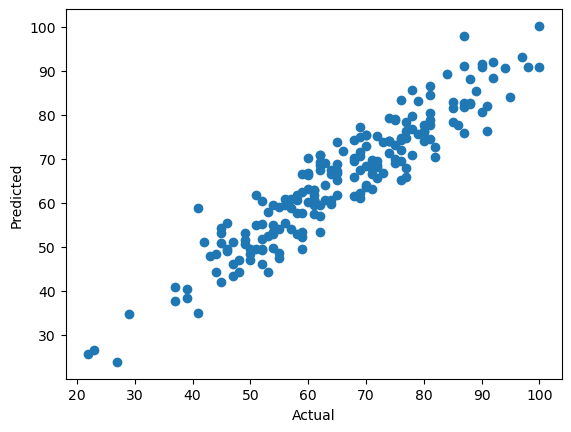

In [63]:
#Plot Ytest- y_pred

plt.scatter(Y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

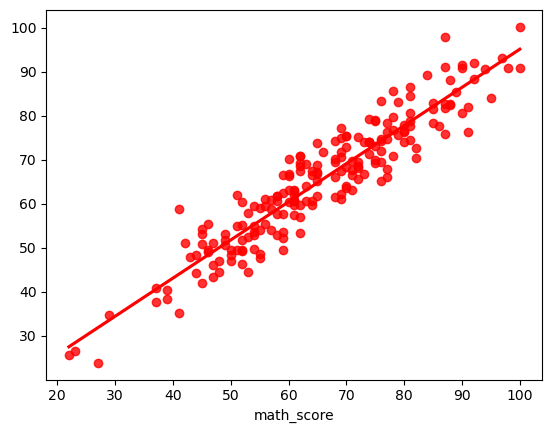

In [64]:
sns.regplot(x=Y_test,y=y_pred,ci=None,color ='red');


In [67]:
#Difference between Actual and Predicted Values
pred_df=pd.DataFrame({'Actual Value':Y_test,'Predicted Value':y_pred,'Difference':Y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
118,51,54.93750,-3.93750
19,54,49.81250,4.18750
41,58,61.71875,-3.71875
425,62,53.34375,8.65625
221,87,82.65625,4.34375
...,...,...,...
714,60,63.15625,-3.15625
744,55,54.03125,0.96875
671,52,55.25000,-3.25000
286,97,93.21875,3.78125
